## Loading the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import seaborn as sns
from xgboost import XGBRegressor

## Load data
### get data from here:
https://www.kaggle.com/brijbhushannanda1979/bigmart-sales-data

In [2]:
big_mart_data = pd.read_csv('/Users/karthik/Downloads/train.csv')
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data exploration

In [3]:
big_mart_data.shape

(8523, 12)

In [4]:
big_mart_data.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [5]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We need to take care of these null values.

categorical_features:
* Item_Identifier
* Item_Fat_Content
* Item_Type
* Outlet_Identifier
* Outlet_Size
* Outlet_Location_Type
* Outlet_Type

We use LabelEncoder to convert the categorical data to numerical data type

In [6]:
# Let's replace null values of "Item_Weight" with it's mean value

big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(),inplace=True)

In [7]:
outlet_Size_mode = big_mart_data['Outlet_Size'].mode()[0]
outlet_Size_mode

'Medium'

In [8]:
big_mart_data.groupby('Outlet_Type')['Outlet_Size'].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  Small          1860
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

We can see that most of the foe every outlet_type, most of the outlet_size is 'medium' and also the mode of Outlet_Size is also medium. Hence, we use .fillna() method to replace null values with 'medium' for big_mart_data['Outlet_Size']

In [9]:
# Find the mode of Outlet_Size and replace it's null values with it's mode value

big_mart_data['Outlet_Size'].fillna(outlet_Size_mode,inplace=True)

In [10]:
big_mart_data.isna().any()

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

## Data Analysis

In [11]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
sns.set() # gives us a theme for our future plots

/Users/karthik/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

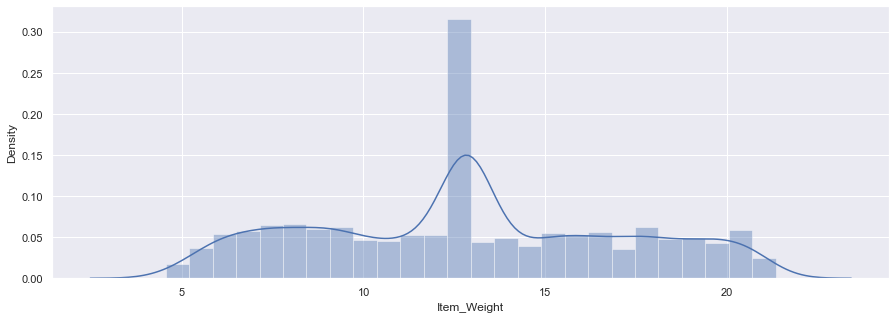

In [13]:
plt.figure(figsize=(15,5))
sns.distplot(big_mart_data.Item_Weight)

/Users/karthik/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

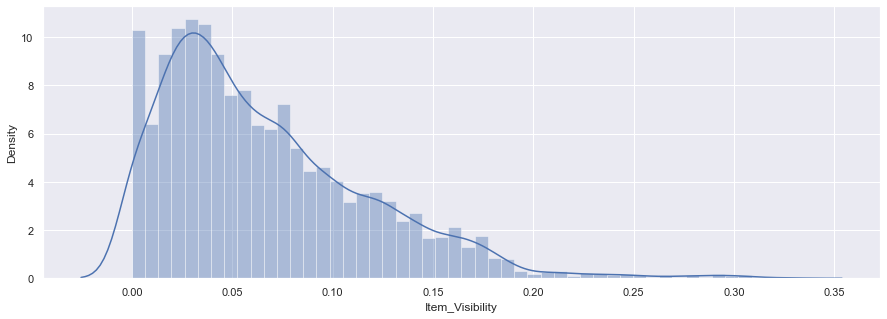

In [14]:
plt.figure(figsize=(15,5))
sns.distplot(big_mart_data.Item_Visibility)

/Users/karthik/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

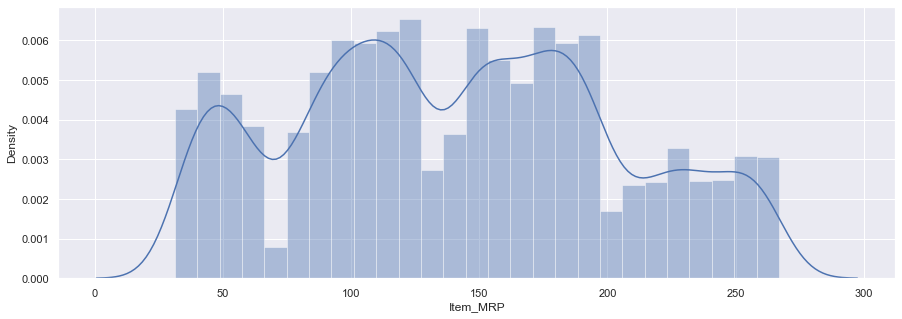

In [15]:
plt.figure(figsize=(15,5))
sns.distplot(big_mart_data.Item_MRP)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

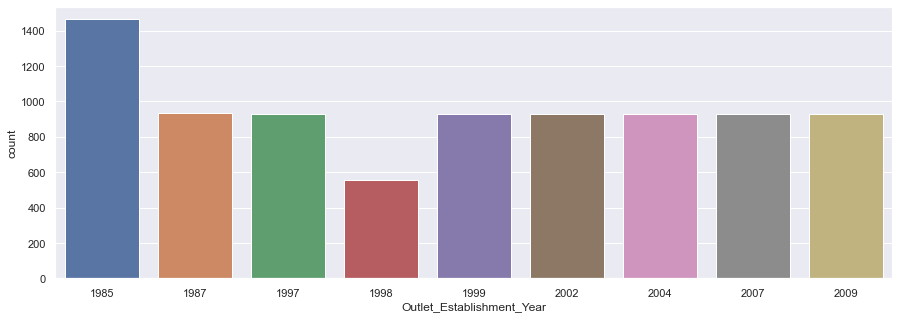

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x= big_mart_data.Outlet_Establishment_Year)

/Users/karthik/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

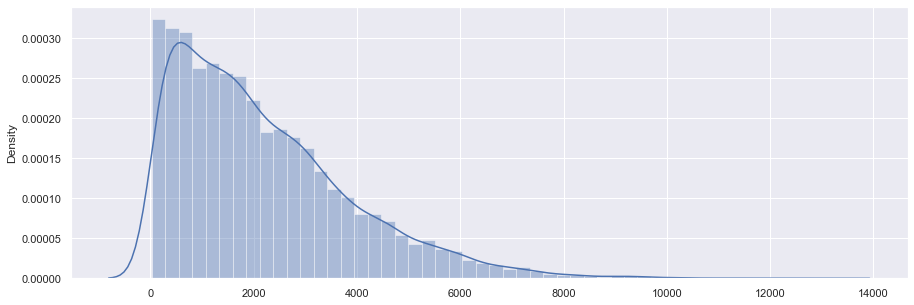

In [17]:
plt.figure(figsize=(15,5))
sns.distplot(x= big_mart_data.Item_Outlet_Sales)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

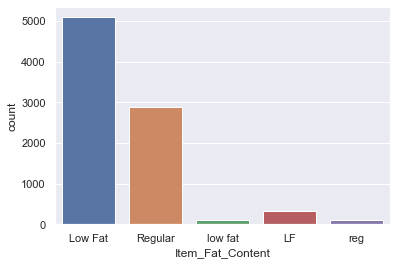

In [18]:
sns.countplot(x= big_mart_data.Item_Fat_Content)

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

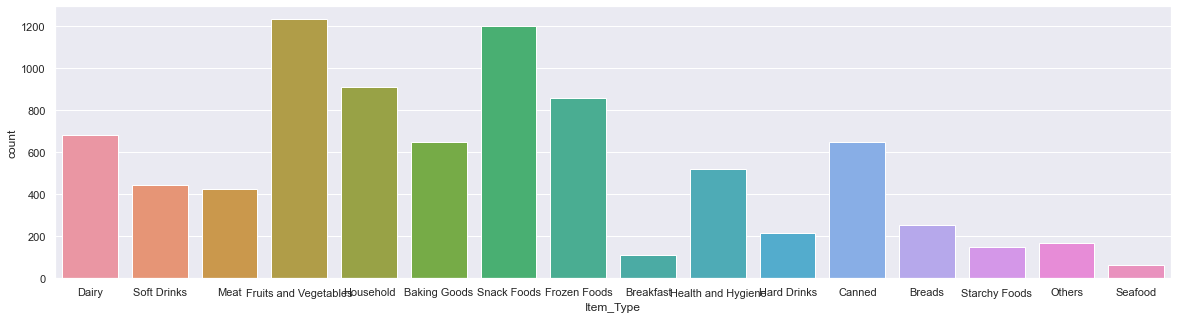

In [19]:
plt.figure(figsize=(20,5))
sns.countplot(x= big_mart_data.Item_Type)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

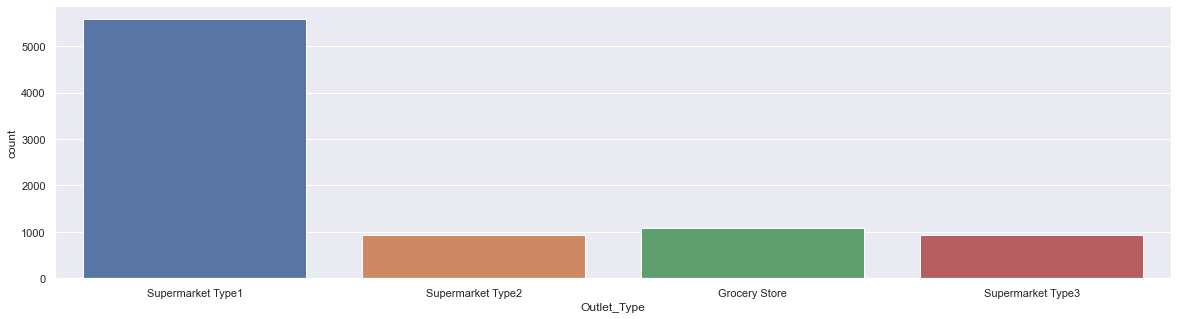

In [20]:
plt.figure(figsize=(20,5))
sns.countplot(x= big_mart_data.Outlet_Type)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

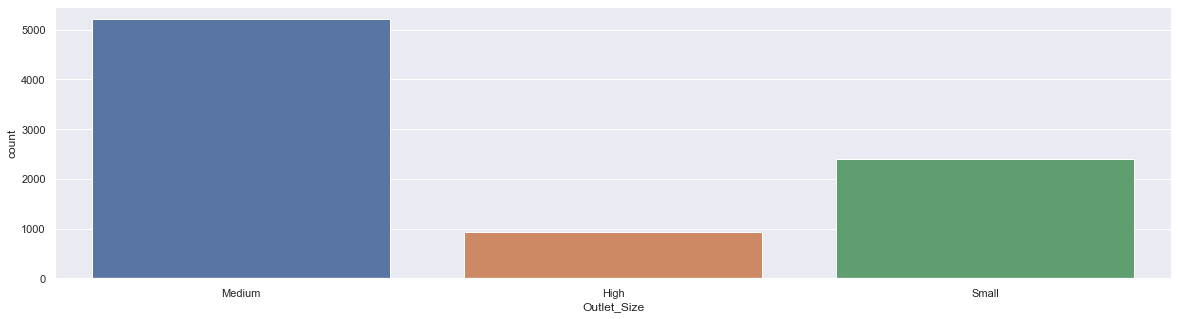

In [21]:
plt.figure(figsize=(20,5))
sns.countplot(x= big_mart_data.Outlet_Size)

In [22]:
big_mart_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Data pre-processing

In [23]:
# Let's convert all the category values to numerical values 
le = LabelEncoder()

In [24]:
big_mart_data.Item_Fat_Content = le.fit_transform(big_mart_data.Item_Fat_Content)

In [25]:
big_mart_data['Item_Identifier'] = le.fit_transform(big_mart_data['Item_Identifier'])

In [26]:
big_mart_data.Item_Type = le.fit_transform(big_mart_data.Item_Type)

In [27]:
big_mart_data.Outlet_Identifier = le.fit_transform(big_mart_data.Outlet_Identifier)

In [28]:
big_mart_data.Outlet_Size = le.fit_transform(big_mart_data.Outlet_Size)

In [29]:
big_mart_data.Outlet_Location_Type = le.fit_transform(big_mart_data.Outlet_Location_Type)

In [30]:
big_mart_data.Outlet_Type = le.fit_transform(big_mart_data.Outlet_Type)

In [31]:
big_mart_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


## Train Test Split

In [32]:
X = big_mart_data.drop(['Item_Outlet_Sales'],axis=1)
y = big_mart_data['Item_Outlet_Sales']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [34]:
model = XGBRegressor(learning_rate=0.04)

In [35]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.04, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
y_pred = model.predict(X_test)

In [37]:
metrics.r2_score(y_test,y_pred)

0.6256076128623596

## Now let's use the entire train.csv for training and predict for the test.csv

In [38]:
model.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.04, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
big_mart_data_test = pd.read_csv('/Users/karthik/Downloads/test.csv')
big_mart_data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [40]:
big_mart_data_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [41]:
big_mart_data_test['Item_Weight'].fillna(big_mart_data_test['Item_Weight'].mean(),inplace=True)

In [42]:
big_mart_data_test.Outlet_Size.mode()

0    Medium
dtype: object

In [43]:
big_mart_data_test['Outlet_Size'].fillna(outlet_Size_mode,inplace=True)

In [44]:
big_mart_data_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [45]:
big_mart_data_test.Item_Fat_Content = le.fit_transform(big_mart_data_test.Item_Fat_Content)
big_mart_data_test.Item_Identifier = le.fit_transform(big_mart_data_test.Item_Identifier)
big_mart_data_test.Item_Type = le.fit_transform(big_mart_data_test.Item_Type)
big_mart_data_test.Outlet_Identifier = le.fit_transform(big_mart_data_test.Outlet_Identifier)
big_mart_data_test.Outlet_Size = le.fit_transform(big_mart_data_test.Outlet_Size)
big_mart_data_test.Outlet_Location_Type = le.fit_transform(big_mart_data_test.Outlet_Location_Type)
big_mart_data_test.Outlet_Type = le.fit_transform(big_mart_data_test.Outlet_Type)

In [46]:
big_mart_data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3


In [47]:
model.predict(big_mart_data_test).tolist()

[1587.5450439453125,
 1312.276611328125,
 515.9055786132812,
 2388.950439453125,
 6157.2265625,
 1861.6636962890625,
 643.9454345703125,
 2008.4583740234375,
 1494.8917236328125,
 3000.57568359375,
 1865.9066162109375,
 1360.76953125,
 671.8949584960938,
 2020.7484130859375,
 747.4069213867188,
 2388.424072265625,
 3023.805908203125,
 2935.968994140625,
 2963.552734375,
 454.2263488769531,
 2817.098388671875,
 3366.372802734375,
 787.76611328125,
 348.6415100097656,
 3044.709716796875,
 405.4249267578125,
 777.0869750976562,
 2460.068115234375,
 4080.654541015625,
 1967.9317626953125,
 65.33251953125,
 2894.568359375,
 511.6580505371094,
 5085.7529296875,
 2516.32421875,
 5541.96630859375,
 2229.50830078125,
 244.19862365722656,
 3081.129150390625,
 2452.06689453125,
 1784.3651123046875,
 264.6520080566406,
 2869.059326171875,
 2193.97802734375,
 323.214111328125,
 1714.3797607421875,
 174.18386840820312,
 3031.82958984375,
 3756.16845703125,
 2031.259033203125,
 910.0504150390625,
 16